Project: Solar Plant Performance Analysis & Simple Prediction

Goal:

Analyze 2 solar plants’ generation + weather data

Compute performance metrics (PR, CUF, availability)

Identify low-performing inverters or maintenance needs

(Optional) Predict next-day energy generation

In [70]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd
import numpy as np


In [72]:
#load CSVs
plant1_gen=pd.read_csv("Plant_1_Generation_Data.csv")
plant1_weather=pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

plant2_gen=pd.read_csv("Plant_2_Generation_Data.csv")
plant2_weather=pd.read_csv("Plant_2_Weather_Sensor_Data.csv")

In [73]:
#inspecting 
print(plant1_gen.head())



          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  


In [74]:
print(plant1_weather.head())


             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0  


In [75]:
print(plant2_gen.head())


             DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07  


In [76]:
print(plant1_weather.head())

             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0  


In [77]:
plant1_gen.shape

(68778, 7)

In [78]:
plant1_weather.shape

(3182, 6)

In [79]:
plant2_gen.shape

(67698, 7)

In [80]:
plant2_weather.shape

(3259, 6)

In [81]:
plant1_gen.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [82]:
plant1_gen.dtypes

DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

In [83]:
plant1_weather.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')

In [84]:
plant1_weather.dtypes

DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object

In [85]:
plant2_gen.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [86]:
plant2_gen.dtypes

DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

In [87]:
plant2_weather.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')

In [88]:
plant2_weather.dtypes

DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object

In [89]:
#Right now, DATE_TIME is a string (object type). To perform calculations, we convert it to a datetime object:


plant1_gen['DATE_TIME'] = pd.to_datetime(plant1_gen['DATE_TIME'], dayfirst=True)
plant1_weather['DATE_TIME'] = pd.to_datetime(plant1_weather['DATE_TIME'], dayfirst=True)


C:\Users\palla\AppData\Local\Temp\ipykernel_3256\820594769.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  plant1_weather['DATE_TIME'] = pd.to_datetime(plant1_weather['DATE_TIME'], dayfirst=True)


In [90]:
#dayfirst=True → because our format is DD-MM-YYYY.

#After this, pandas recognizes it as a time series, so we can do

In [91]:
# Extract only the date (without time)
plant1_gen['date'] = plant1_gen['DATE_TIME'].dt.date

# Extract hour
plant1_gen['hour'] = plant1_gen['DATE_TIME'].dt.hour

# Filter data for a specific day
plant1_gen[plant1_gen['date'] == pd.to_datetime('2020-05-15').date()]


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date,hour
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,0
...,...,...,...,...,...,...,...,...,...
1949,2020-05-15 23:00:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,6387.0,7045068.0,2020-05-15,23
1950,2020-05-15 23:00:00,4135001,wCURE6d3bPkepu2,0.0,0.0,6329.0,6788927.0,2020-05-15,23
1951,2020-05-15 23:00:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,6386.0,7014252.0,2020-05-15,23
1952,2020-05-15 23:00:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,6396.0,6345776.0,2020-05-15,23


In [92]:
plant2_gen['DATE_TIME'] = pd.to_datetime(plant1_gen['DATE_TIME'], dayfirst=True)
plant2_weather['DATE_TIME'] = pd.to_datetime(plant1_weather['DATE_TIME'], dayfirst=True)

In [93]:
plant2_gen.dtypes

DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
dtype: object

In [94]:
# ------------------- Notes on DATE_TIME Column -------------------

# 1️⃣ What DATE_TIME is:
# - Represents the exact timestamp of each measurement.
# - In generation data: inverter-level readings (DC/AC power, daily/total yield)
# - In weather data: plant-level readings (ambient temp, module temp, irradiation)
# - Format can be DD-MM-YYYY HH:MM (or similar)

# 2️⃣ Why it matters:
# - Used for time-based operations: daily/weekly/monthly aggregation
# - Used to merge generation + weather datasets (on DATE_TIME + PLANT_ID)
# - Anchor column for feature engineering: PR, CUF, availability, anomaly detection

# 3️⃣ Convert to datetime object:
# - Necessary to perform calculations, filtering, grouping
# Example:
# plant1_gen['DATE_TIME'] = pd.to_datetime(plant1_gen['DATE_TIME'], dayfirst=True)
# plant1_weather['DATE_TIME'] = pd.to_datetime(plant1_weather['DATE_TIME'], dayfirst=True)

# 4️⃣ Extract useful time components:
# - plant1_gen['date'] = plant1_gen['DATE_TIME'].dt.date   # only date
# - plant1_gen['hour'] = plant1_gen['DATE_TIME'].dt.hour   # only hour

# 5️⃣ Example: total daily energy per inverter
# daily_yield = plant1_gen.groupby(['SOURCE_KEY', plant1_gen['DATE_TIME'].dt.date])['DAILY_YIELD'].sum().reset_index()
# - Groups by inverter and day
# - Sums daily yield → energy generated per inverter per day
# - Without converting DATE_TIME to datetime, grouping won’t work

# ✅ Key takeaways for interviews:
# - Always convert timestamp to datetime for time-series data
# - Use .dt accessor to extract day, hour, month as needed
# - DATE_TIME is central for aggregation, merging, and feature engineering


In [95]:
print(plant1_gen.dtypes)
print(plant1_weather.dtypes)


DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
date                   object
hour                    int32
dtype: object
DATE_TIME              datetime64[ns]
PLANT_ID                        int64
SOURCE_KEY                     object
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object


In [96]:
print(plant2_gen.dtypes)
print(plant2_weather.dtypes)

DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
dtype: object
DATE_TIME              datetime64[ns]
PLANT_ID                        int64
SOURCE_KEY                     object
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object


In [97]:
plant1_gen['date'] = plant1_gen['DATE_TIME'].dt.date
plant1_gen['hour'] = plant1_gen['DATE_TIME'].dt.hour


In [98]:
# ------------------- Columns to Focus On for Analysis -------------------

# Generation file:
# DATE_TIME        → Anchor for time-series analysis; used for grouping, merging, filtering
# PLANT_ID         → Identifies which plant; useful if working with multiple plants
# SOURCE_KEY       → Unique inverter ID; enables inverter-level aggregation
# DC_POWER / AC_POWER → Primary energy measurements at inverter level
# DAILY_YIELD      → Total energy produced each day; key for calculating PR/CUF
# TOTAL_YIELD      → Cumulative energy produced; useful for trend analysis
# date / hour      → Derived from DATE_TIME; used for daily/hourly feature engineering

# Weather file:
# DATE_TIME        → Align with generation data for merging and time-series analysis
# AMBIENT_TEMPERATURE → Affects panel efficiency; feature for modeling
# MODULE_TEMPERATURE  → Helps detect overheating or abnormal operation
# IRRADIATION         → Main driver of power generation; critical for performance analysis


In [99]:
#errors='coerce' will convert invalid entries to NaN

In [100]:
#Handle missing values
print(plant1_gen.isnull().sum())

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
date           0
hour           0
dtype: int64


In [101]:
print(plant1_weather.isnull().sum())

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [102]:
print(plant2_gen.isnull().sum())

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


In [103]:
print(plant2_weather.isnull().sum())

DATE_TIME              77
PLANT_ID                0
SOURCE_KEY              0
AMBIENT_TEMPERATURE     0
MODULE_TEMPERATURE      0
IRRADIATION             0
dtype: int64


In [104]:
print(plant1_gen.isnull().any())


DATE_TIME      False
PLANT_ID       False
SOURCE_KEY     False
DC_POWER       False
AC_POWER       False
DAILY_YIELD    False
TOTAL_YIELD    False
date           False
hour           False
dtype: bool


In [105]:
missing_percent = plant1_gen.isnull().sum() / len(plant1_gen) * 100
print(missing_percent)


DATE_TIME      0.0
PLANT_ID       0.0
SOURCE_KEY     0.0
DC_POWER       0.0
AC_POWER       0.0
DAILY_YIELD    0.0
TOTAL_YIELD    0.0
date           0.0
hour           0.0
dtype: float64


In [106]:
#df.fillna(method='ffill', inplace=True)
#forward fill
#df.fillna(method='bfill', inplace=True)
#Backward fill (use next value):

#df.fillna(method='bfill', inplace=True)


#Drop missing rows (if few and not critical):

#df.dropna(inplace=True)


In [107]:
plant1_gen.duplicated().sum()

0

In [108]:
num_duplicates = plant1_gen.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [109]:
plant1_weather.duplicated().sum()

0

In [110]:
plant1_gen.duplicated().sum()

0

In [111]:
plant2_weather.duplicated().sum()

0

In [112]:
# Remove all duplicate rows (keep first occurrence)
#plant1_gen= plant1_gen.drop_duplicates()

# Remove duplicates based on specific columns
#plant1_gen = plant1_gen.drop_duplicates(subset=['DATE_TIME','SOURCE_KEY'])

In [113]:
# For example, check duplicates based on DATE_TIME and SOURCE_KEY
##duplicates = df.duplicated(subset=['DATE_TIME','SOURCE_KEY'])
#print(duplicates.sum())

In [114]:
plant1_gen.rename(columns={'DATE_TIME':'timestamp'}, inplace=True)
plant1_weather.rename(columns={'DATE_TIME':'timestamp'}, inplace=True)
#Makes merging with weather data easier

#Keeps code readable


In [115]:
plant2_gen.rename(columns={'DATE_TIME':'timestamp'}, inplace=True)
plant2_weather.rename(columns={'DATE_TIME':'timestamp'}, inplace=True)

In [116]:
plant1_gen.columns

Index(['timestamp', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'date', 'hour'],
      dtype='object')

In [117]:
plant1_gen = plant1_gen[plant1_gen['AC_POWER'] > 0]
print(plant1_gen)

                timestamp  PLANT_ID       SOURCE_KEY   DC_POWER  AC_POWER  \
510   2020-05-15 06:00:00   4135001  1BY6WEcLGh8j5v7  37.142857  3.585714   
511   2020-05-15 06:00:00   4135001  1IF53ai7Xc0U56Y  53.500000  5.162500   
512   2020-05-15 06:00:00   4135001  3PZuoBAID5Wc2HD  58.000000  5.585714   
513   2020-05-15 06:00:00   4135001  7JYdWkrLSPkdwr4  58.428571  5.628571   
514   2020-05-15 06:00:00   4135001  McdE0feGgRqW7Ca  54.375000  5.250000   
...                   ...       ...              ...        ...       ...   
68311 2020-06-17 18:30:00   4135001  uHbuxQJl8lW7ozc  79.000000  7.614286   
68312 2020-06-17 18:30:00   4135001  wCURE6d3bPkepu2  75.714286  7.300000   
68313 2020-06-17 18:30:00   4135001  z9Y9gH1T5YWrNuG  77.428571  7.471429   
68314 2020-06-17 18:30:00   4135001  zBIq5rxdHJRwDNY  74.857143  7.228571   
68315 2020-06-17 18:30:00   4135001  zVJPv84UY57bAof  77.714286  7.485714   

       DAILY_YIELD  TOTAL_YIELD        date  hour  
510       0.000000  625

In [118]:
plant1_gen['date'] = plant1_gen['timestamp'].dt.date
plant1_gen['hour'] = plant1_gen['timestamp'].dt.hour

plant1_weather['date'] = plant1_weather['timestamp'].dt.date
plant1_weather['hour'] = plant1_weather['timestamp'].dt.hour


In [119]:
plant2_gen['date'] = plant2_gen['timestamp'].dt.date
plant2_gen['hour'] = plant2_gen['timestamp'].dt.hour

plant2_weather['date'] = plant2_weather['timestamp'].dt.date
plant2_weather['hour'] = plant2_weather['timestamp'].dt.hour

date → used for daily aggregation (daily yield, PR, CUF)

hour → used for hourly analysis or detecting patterns/faults

Time-based Features

From our timestamp column, create:

Date → for daily aggregation

Hour → for hourly patterns

Day of week → to check weekday vs weekend performance

Month / Week → for trends across the mont

In [120]:
# Step 2: Extract time-based features
for df in [plant1_gen, plant1_weather, plant2_gen, plant2_weather]:
    df['date'] = df['timestamp'].dt.date          # Date only (YYYY-MM-DD)
    df['hour'] = df['timestamp'].dt.hour         # Hour of the day
    df['day_of_week'] = df['timestamp'].dt.day_name()  # Monday, Tuesday...
    df['month'] = df['timestamp'].dt.month       # Month number 1-12
    df['week'] = df['timestamp'].dt.isocalendar().week # Week number of year


Time features allow aggregation, spotting trends, and seasonal analysis.

In [121]:
# Step 3: Merge generation and weather datasets
plant1 = pd.merge(plant1_gen, plant1_weather, on=['timestamp','PLANT_ID'], how='left')
plant2 = pd.merge(plant2_gen, plant2_weather, on=['timestamp','PLANT_ID'], how='left')

In [122]:
# Step 4: Weather-based features
for df in [plant1, plant2]:
    df['temp_diff'] = df['MODULE_TEMPERATURE'] - df['AMBIENT_TEMPERATURE']  # Module vs ambient temp
    df['irradiation_level'] = pd.cut(df['IRRADIATION'],
                                     bins=[-1, 200, 400, 600, 800, 1000],
                                     labels=['very_low','low','medium','high','very_high'])


In [123]:
plant1.rename(columns={
    'SOURCE_KEY_x':'SOURCE_KEY',
    'date_x':'date',
    'hour_x':'hour'
}, inplace=True)


In [124]:
plant1 = plant1.drop(columns=['SOURCE_KEY_y', 'date_y', 'hour_y', 'day_of_week_y', 'month_y', 'week_y'])


In [125]:
print(plant1.columns)


Index(['timestamp', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'date', 'hour', 'day_of_week_x',
       'month_x', 'week_x', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'temp_diff', 'irradiation_level'],
      dtype='object')


In [126]:
print(plant1.columns)


Index(['timestamp', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'date', 'hour', 'day_of_week_x',
       'month_x', 'week_x', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'temp_diff', 'irradiation_level'],
      dtype='object')


In [127]:
print(plant2.columns.tolist())


['timestamp', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'date_x', 'hour_x', 'day_of_week_x', 'month_x', 'week_x', 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'date_y', 'hour_y', 'day_of_week_y', 'month_y', 'week_y', 'temp_diff', 'irradiation_level']


In [128]:
plant2 = plant2.rename(columns={
    'SOURCE_KEY_x': 'SOURCE_KEY',
    'date_x': 'date',
    'hour_x': 'hour'
})


In [129]:
# Step 5: Daily energy aggregation per inverter
daily_plant1 = plant1.groupby(['SOURCE_KEY','date'])['DAILY_YIELD'].sum().reset_index().rename(columns={'DAILY_YIELD':'daily_energy'})
daily_plant2 = plant2.groupby(['SOURCE_KEY','date'])['DAILY_YIELD'].sum().reset_index().rename(columns={'DAILY_YIELD':'daily_energy'})
print(daily_plant1.head())

        SOURCE_KEY        date   daily_energy
0  1BY6WEcLGh8j5v7  2020-05-15  136298.232144
1  1BY6WEcLGh8j5v7  2020-05-16  159051.732142
2  1BY6WEcLGh8j5v7  2020-05-17  178421.428572
3  1BY6WEcLGh8j5v7  2020-05-18  103102.660714
4  1BY6WEcLGh8j5v7  2020-05-19  131696.285714


In [130]:
daily_plant2 = plant2.groupby(['SOURCE_KEY','date'])['DAILY_YIELD'].sum()\
                     .reset_index()\
                     .rename(columns={'DAILY_YIELD':'daily_energy'})
print(daily_plant2.head())

        SOURCE_KEY        date   daily_energy
0  4UPUqMRk7TRMgml  2020-05-15  219788.528571
1  4UPUqMRk7TRMgml  2020-05-16  239244.438095
2  4UPUqMRk7TRMgml  2020-05-17  314403.576190
3  4UPUqMRk7TRMgml  2020-05-18  360694.690476
4  4UPUqMRk7TRMgml  2020-05-19  215707.439286


In [131]:
# Step 6: Lag features for trend analysis
for df in [plant1, plant2]:
    df['prev_hour_energy'] = df.groupby('SOURCE_KEY')['AC_POWER'].shift(1)       # previous hour AC power
    df['prev_day_energy'] = df.groupby('SOURCE_KEY')['DAILY_YIELD'].shift(24)    # previous day daily yield (if hourly)

In [132]:
# Step 7: Placeholder for PR and CUF calculations
for df in [plant1, plant2]:
    df['PR'] = None
    df['CUF'] = None

In [133]:
# Optional: check the first 5 rows
print(plant1.head())
print(daily_plant1.head())

            timestamp  PLANT_ID       SOURCE_KEY   DC_POWER  AC_POWER  \
0 2020-05-15 06:00:00   4135001  1BY6WEcLGh8j5v7  37.142857  3.585714   
1 2020-05-15 06:00:00   4135001  1IF53ai7Xc0U56Y  53.500000  5.162500   
2 2020-05-15 06:00:00   4135001  3PZuoBAID5Wc2HD  58.000000  5.585714   
3 2020-05-15 06:00:00   4135001  7JYdWkrLSPkdwr4  58.428571  5.628571   
4 2020-05-15 06:00:00   4135001  McdE0feGgRqW7Ca  54.375000  5.250000   

   DAILY_YIELD  TOTAL_YIELD        date  hour day_of_week_x  ...  week_x  \
0          0.0    6259559.0  2020-05-15     6        Friday  ...      20   
1          0.0    6183645.0  2020-05-15     6        Friday  ...      20   
2          0.0    6987759.0  2020-05-15     6        Friday  ...      20   
3          0.0    7602960.0  2020-05-15     6        Friday  ...      20   
4          0.0    7158964.0  2020-05-15     6        Friday  ...      20   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  temp_diff  \
0            24.088446           2

Step-by-Step Explanation
Step 1: Rename timestamp
plant1_gen.rename(columns={'DATE_TIME':'timestamp'}, inplace=True)


Makes column names consistent across generation and weather datasets.

Easier to merge later.

Step 2: Extract time-based features
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month
df['week'] = df['timestamp'].dt.isocalendar().week


Helps in aggregation, trend analysis, and seasonality detection.

Step 3: Merge generation & weather
plant1 = pd.merge(plant1_gen, plant1_weather, on=['timestamp','PLANT_ID'], how='left')


Combines inverter-level generation with plant-level weather.

Essential for PR/CUF calculation and energy-weather correlation.

Step 4: Weather-based features
df['temp_diff'] = df['MODULE_TEMPERATURE'] - df['AMBIENT_TEMPERATURE']


Detects overheating or panel inefficiency.

df['irradiation_level'] = pd.cut(df['IRRADIATION'], bins=[-1,200,400,600,800,1000], labels=[...])


Categorizes solar irradiance for analysis and anomaly detection.

Step 5: Daily aggregation
daily_plant1 = plant1.groupby(['SOURCE_KEY','date'])['DAILY_YIELD'].sum().reset_index()


Sum of energy produced per inverter per day.

Useful for PR/CUF and spotting underperforming inverters.

Step 6: Lag features
df['prev_hour_energy'] = df.groupby('SOURCE_KEY')['AC_POWER'].shift(1)
df['prev_day_energy'] = df.groupby('SOURCE_KEY')['DAILY_YIELD'].shift(24)


Previous readings allow trend analysis.

Helps detect faulty inverters or sudden drops.

Step 7: Placeholder PR & CUF
df['PR'] = None
df['CUF'] = None


Calculated later using daily energy, plant capacity, and reference irradiation.

Keeps dataframe ready for metric calculations.

💡 Interview Tip:

“I first clean and wrangle the data, create time-based features (date, hour, day_of_week), merge generation and weather datasets, calculate derived features like temp_diff and irradiation levels, aggregate daily energy per inverter, create lag features for trend analysis, and prepare placeholders for PR and CUF metrics.”

In [134]:
''' Feature Engineering steps i have done

✅ Extracted date & hour from timestamp → allows grouping & lag features
✅ Calculated temp_diff → shows panel heating vs ambient (can indicate efficiency)
✅ Created irradiation_level → categories like very_low, low, etc. for analysis
✅ Added lag features → prev_hour_energy, prev_day_energy (helpful for ML prediction)'''

' Feature Engineering steps i have done\n\n✅ Extracted date & hour from timestamp → allows grouping & lag features\n✅ Calculated temp_diff → shows panel heating vs ambient (can indicate efficiency)\n✅ Created irradiation_level → categories like very_low, low, etc. for analysis\n✅ Added lag features → prev_hour_energy, prev_day_energy (helpful for ML prediction)'

In [135]:
# Temperature difference (module - ambient)
plant1_weather['temp_diff'] = plant1_weather['MODULE_TEMPERATURE'] - plant1_weather['AMBIENT_TEMPERATURE']


In [136]:
# Categorize irradiation
def categorize_irradiation(x):
    if x <= 200:
        return 'very_low'
    elif x <= 400:
        return 'low'
    elif x <= 600:
        return 'medium'
    elif x <= 800:
        return 'high'
    else:
        return 'very_high'

plant1_weather['irradiation_level'] = plant1_weather['IRRADIATION'].apply(categorize_irradiation)

In [137]:
# =========================
# Step 4: Merge Generation & Weather
# =========================
plant1 = pd.merge(plant1_gen, plant1_weather, on='timestamp', how='left')

# =========================

In [145]:
# Step 5: Lag Features for ML
# =========================
# Previous hour energy
# Using SOURCE_KEY_X
plant1['prev_hour_energy'] = plant1.groupby('SOURCE_KEY_X')['DAILY_YIELD'].shift(1)
plant1['prev_day_energy'] = plant1.groupby('SOURCE_KEY_X')['DAILY_YIELD'].shift(24)

# Fill NaN in lag features with 0
plant1['prev_hour_energy'] = plant1['prev_hour_energy'].fillna(0)
plant1['prev_day_energy'] = plant1['prev_day_energy'].fillna(0)

In [146]:
# =========================
# Step 6: Daily Aggregation
# =========================
daily_plant1 = plant1.groupby(['SOURCE_KEY_X', 'DATE_X'])['DAILY_YIELD'] \
                     .sum() \
                     .reset_index() \
                     .rename(columns={'DAILY_YIELD':'daily_energy'})


In [141]:
# =========================
# Step 7: Preview
# =========================
print(daily_plant1.head())
print(plant1.head())

        SOURCE_KEY        date   daily_energy
0  1BY6WEcLGh8j5v7  2020-05-15  136298.232144
1  1BY6WEcLGh8j5v7  2020-05-16  159051.732142
2  1BY6WEcLGh8j5v7  2020-05-17  178421.428572
3  1BY6WEcLGh8j5v7  2020-05-18  103102.660714
4  1BY6WEcLGh8j5v7  2020-05-19  131696.285714
            timestamp  PLANT_ID_x     SOURCE_KEY_x   DC_POWER  AC_POWER  \
0 2020-05-15 06:00:00     4135001  1BY6WEcLGh8j5v7  37.142857  3.585714   
1 2020-05-15 06:00:00     4135001  1IF53ai7Xc0U56Y  53.500000  5.162500   
2 2020-05-15 06:00:00     4135001  3PZuoBAID5Wc2HD  58.000000  5.585714   
3 2020-05-15 06:00:00     4135001  7JYdWkrLSPkdwr4  58.428571  5.628571   
4 2020-05-15 06:00:00     4135001  McdE0feGgRqW7Ca  54.375000  5.250000   

   DAILY_YIELD  TOTAL_YIELD      date_x  hour_x day_of_week_x  ...  \
0          0.0    6259559.0  2020-05-15       6        Friday  ...   
1          0.0    6183645.0  2020-05-15       6        Friday  ...   
2          0.0    6987759.0  2020-05-15       6        Friday  

In [142]:
print(plant1.columns)


Index(['timestamp', 'PLANT_ID_x', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'date_x', 'hour_x', 'day_of_week_x',
       'month_x', 'week_x', 'PLANT_ID_y', 'SOURCE_KEY_y',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'date_y',
       'hour_y', 'day_of_week_y', 'month_y', 'week_y', 'temp_diff',
       'irradiation_level'],
      dtype='object')


In [143]:
plant1.columns = plant1.columns.str.strip()  # removes spaces
plant1.columns = plant1.columns.str.upper()  # optional: convert all to uppercase
print(plant1.columns)


Index(['TIMESTAMP', 'PLANT_ID_X', 'SOURCE_KEY_X', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'DATE_X', 'HOUR_X', 'DAY_OF_WEEK_X',
       'MONTH_X', 'WEEK_X', 'PLANT_ID_Y', 'SOURCE_KEY_Y',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DATE_Y',
       'HOUR_Y', 'DAY_OF_WEEK_Y', 'MONTH_Y', 'WEEK_Y', 'TEMP_DIFF',
       'IRRADIATION_LEVEL'],
      dtype='object')


In [144]:
# Example: Suppose inverter capacity = 10 kW
inverter_capacity = 10  # in kW

daily_plant1['CUF'] = (daily_plant1['daily_energy'] / (inverter_capacity * 24)) * 100


In [ ]:
# Sum daily irradiation (plant-level)
daily_irradiation_plant1 = plant1.groupby('date')['IRRADIATION'].sum().reset_index()
daily_energy_plant1 = plant1.groupby('date')['DAILY_YIELD'].sum().reset_index()

pr_df = pd.merge(daily_energy_plant1, daily_irradiation_plant1, on='date')
installed_capacity = 1000  # Example: 1000 kW
pr_df['PR'] = (pr_df['DAILY_YIELD'] / (pr_df['IRRADIATION'] * installed_capacity)) * 100


In [ ]:
for df in [plant1, plant2]:
    availability = df.groupby('SOURCE_KEY_X').apply(lambda x: (x['AC_POWER']>0).sum() / len(x) * 100)
    print(availability.head())


In [ ]:
# Compare daily energy vs average
for df, name in zip([daily_plant1, daily_plant2], ['Plant1', 'Plant2']):
    inverter_avg = df.groupby('SOURCE_KEY')['daily_energy'].mean()
    threshold = inverter_avg.mean() * 0.8  # e.g., 80% of average
    low_perf = inverter_avg[inverter_avg < threshold]
    print(f"{name} Low-performing inverters:\n", low_perf)


In [ ]:
# Sort by plant and date first
daily_plant1 = daily_plant1.sort_values(['SOURCE_KEY_X', 'DATE_X'])

# Previous day energy
daily_plant1['prev_day_energy'] = daily_plant1.groupby('SOURCE_KEY_X')['daily_energy'].shift(1)

# Previous 2 days energy
daily_plant1['prev_2day_energy'] = daily_plant1.groupby('SOURCE_KEY_X')['daily_energy'].shift(2)


In [ ]:
daily_plant1['day_of_week'] = pd.to_datetime(daily_plant1['DATE_X']).dt.dayofweek
daily_plant1['month'] = pd.to_datetime(daily_plant1['DATE_X']).dt.month
daily_plant1['week_of_year'] = pd.to_datetime(daily_plant1['DATE_X']).dt.isocalendar().week


In [ ]:
daily_plant1['rolling_3day_mean'] = daily_plant1.groupby('SOURCE_KEY_X')['daily_energy'].rolling(3).mean().reset_index(0, drop=True)


In [ ]:
daily_plant1 = daily_plant1.dropna()  # simple approach
# OR
daily_plant1.fillna(method='bfill', inplace=True)


In [162]:
# =============================
# Step 8: Calculate Key Performance Metrics (PR, CUF, Availability)
# =============================
# CUF – Capacity Utilization Factor (per inverter per day)
inverter_capacity = 10  # kW per inverter

# Aggregate daily energy per inverter
daily_plant1 = plant1.groupby(['DATE_X', 'SOURCE_KEY_X'])['DAILY_YIELD'].sum().reset_index()

In [196]:
# Calculate CUF = (Actual Energy / (Installed Capacity * 24h)) * 100
daily_plant1['CUF'] = (daily_plant1['DAILY_YIELD'] / (inverter_capacity * 24)) * 100
print(daily_plant1['CUF'])

0      56790.930060
1      63530.773811
2      62393.333333
3      60876.555059
4      65020.625000
           ...     
743    65389.519345
744    64617.782738
745    63928.267856
746    63795.238096
747    64849.563988
Name: CUF, Length: 748, dtype: float64


In [165]:
# =============================
# Performance Ratio (PR) – plant-level efficiency
# =============================
# Sum daily irradiation per plant
daily_irradiation_plant1 = plant1.groupby('DATE_X')['IRRADIATION'].sum().reset_index()
# Sum daily energy per plant
daily_energy_plant1 = plant1.groupby('DATE_X')['DAILY_YIELD'].sum().reset_index()

In [166]:
# Merge energy and irradiation
pr_df = pd.merge(daily_energy_plant1, daily_irradiation_plant1, on='DATE_X')

In [167]:
# Installed capacity of the plant (example)
installed_capacity = 1000  # kW

# Calculate PR = (Actual Energy / (Irradiation * Installed Capacity)) * 100
pr_df['PR'] = (pr_df['DAILY_YIELD'] / (pr_df['IRRADIATION'] * installed_capacity)) * 100

In [168]:
# =============================
# Availability – fraction of time inverter is running
# =============================
# Percentage of time AC_POWER > 0 per inverter
availability = plant1.groupby('SOURCE_KEY_X')['AC_POWER'].apply(lambda x: (x>0).sum() / len(x) * 100).reset_index()
availability.rename(columns={'AC_POWER': 'Availability'}, inplace=True)

In [169]:
# Merge availability with daily inverter metrics
daily_plant1 = pd.merge(daily_plant1, availability, on='SOURCE_KEY_X', how='left')


In [171]:
# =============================
# Step 9: Analyze Low-Performing Inverters
# =============================
# Rank inverters by average daily energy to find low performers
low_perf_inverters = daily_plant1.groupby('SOURCE_KEY_X')['DAILY_YIELD'].mean().sort_values()
print("Low-Performing Inverters (by average daily energy):")
print(low_perf_inverters)

Low-Performing Inverters (by average daily energy):
SOURCE_KEY_X
bvBOhCH3iADSZry    160376.418277
1BY6WEcLGh8j5v7    163294.595203
ih0vzX44oOqAx2f    174995.962710
zBIq5rxdHJRwDNY    176245.757598
z9Y9gH1T5YWrNuG    176283.920238
ZoEaEvLYb1n2sOq    176508.187885
sjndEbLyjtCKgGv    177263.718032
7JYdWkrLSPkdwr4    177793.666585
rGa61gmuvPhdLxV    177811.050245
WRmjgnKYAwPKWDb    177914.426611
YxYtjZvoooNbGkE    178013.545168
wCURE6d3bPkepu2    178028.241632
pkci93gMrogZuBj    178381.594188
zVJPv84UY57bAof    178924.296008
iCRJl6heRkivqQ3    179828.748005
uHbuxQJl8lW7ozc    180351.606524
ZnxXDlPa8U1GXgE    180439.189356
McdE0feGgRqW7Ca    180863.228957
3PZuoBAID5Wc2HD    181404.829237
1IF53ai7Xc0U56Y    181899.725245
VHMLBKoKgIrUVDU    182204.721113
adLQvlD726eNBSB    184747.378501
Name: DAILY_YIELD, dtype: float64


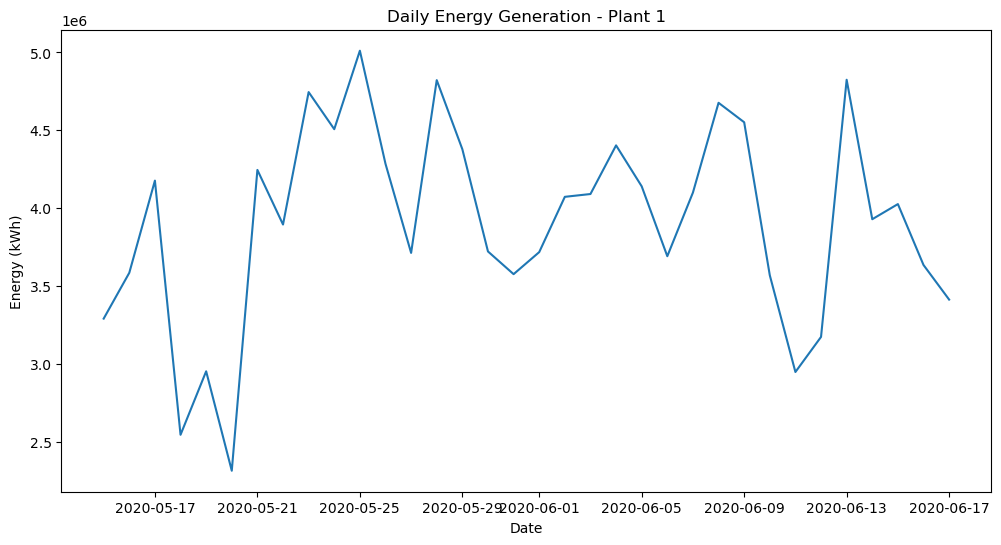

In [174]:
# =============================
# Step 10: Visualizations
# =============================
# Daily energy trend (plant-level)
plt.figure(figsize=(12,6))
daily_energy_plant1.set_index('DATE_X')['DAILY_YIELD'].plot()
plt.title('Daily Energy Generation - Plant 1')
plt.ylabel('Energy (kWh)')
plt.xlabel('Date')
plt.show()

In [195]:
 #Daily Energy Trend
# =============================
# What it shows:
# - How total energy generated changes over time (days).
# - Peaks → high-generation days (sunny, good performance)
# - Dips → cloudy days, shading, maintenance, or inverter downtime

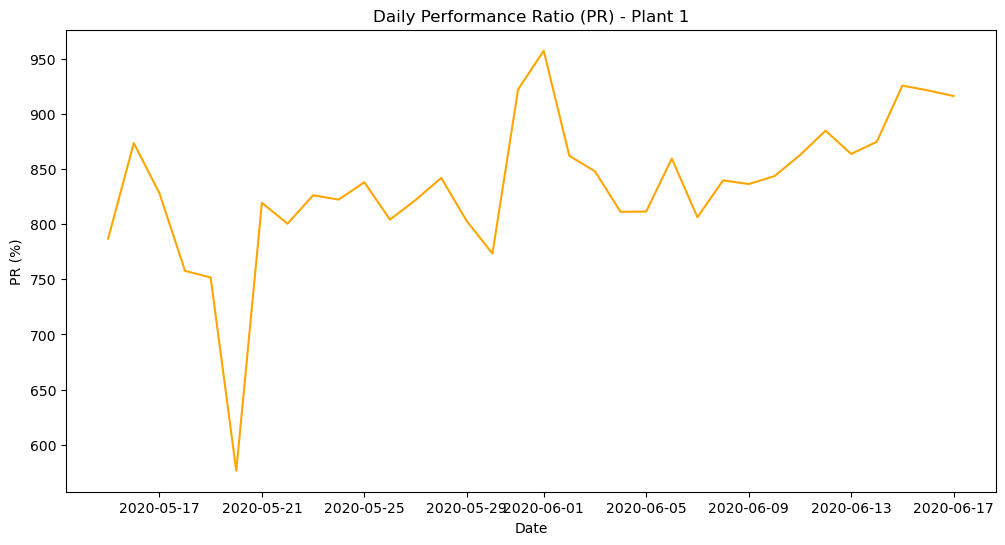

In [176]:
# PR trend over time
plt.figure(figsize=(12,6))
pr_df.set_index('DATE_X')['PR'].plot(color='orange')
plt.title('Daily Performance Ratio (PR) - Plant 1')
plt.ylabel('PR (%)')
plt.xlabel('Date')
plt.show()


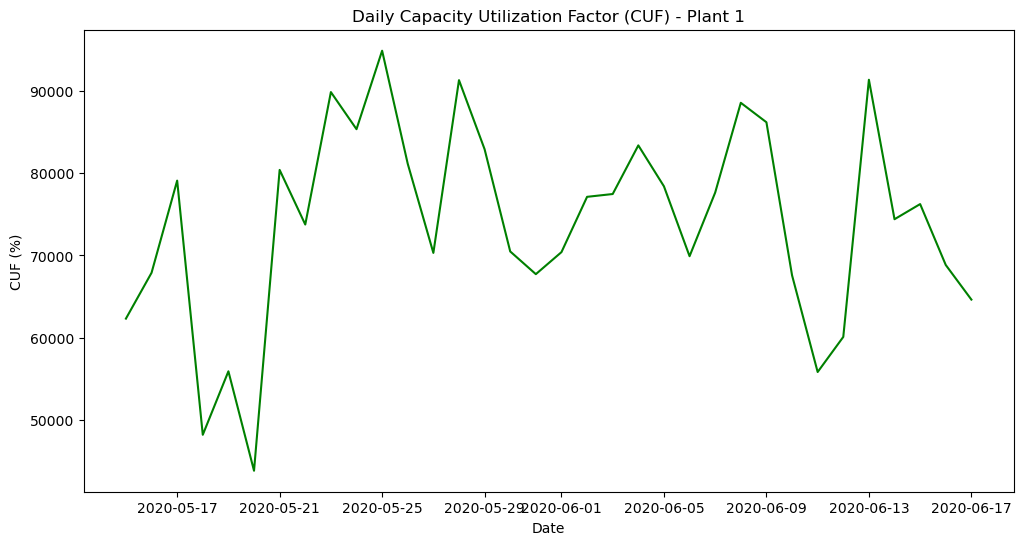

In [177]:
# CUF trend over time
plt.figure(figsize=(12,6))
daily_plant1.groupby('DATE_X')['CUF'].mean().plot(color='green')
plt.title('Daily Capacity Utilization Factor (CUF) - Plant 1')
plt.ylabel('CUF (%)')
plt.xlabel('Date')
plt.show()

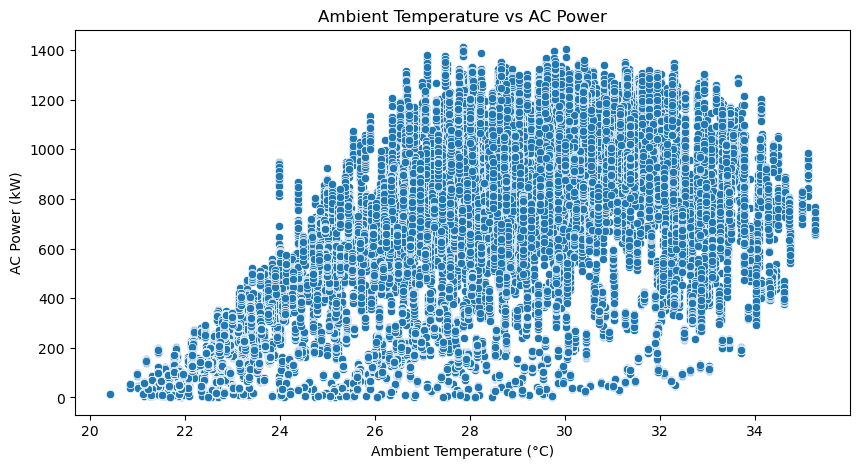

In [188]:
# Temperature vs AC_POWER scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=plant1, x='AMBIENT_TEMPERATURE', y='AC_POWER')  # Correct column name
plt.title('Ambient Temperature vs AC Power')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('AC Power (kW)')
plt.show()


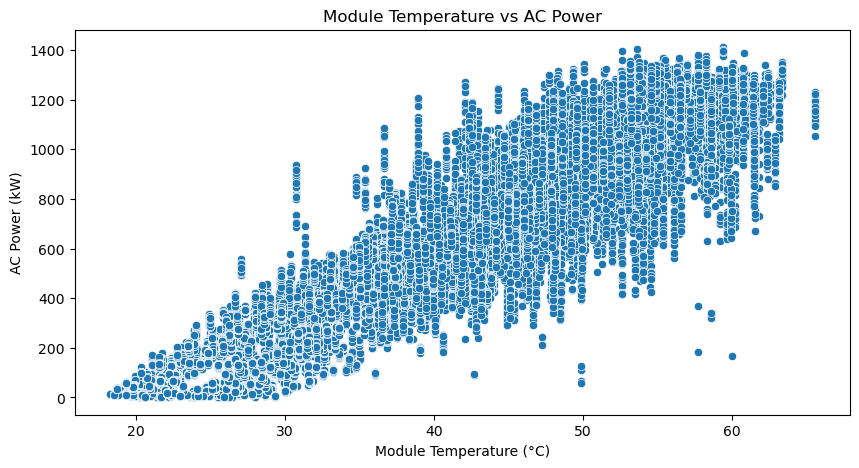

In [189]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=plant1, x='MODULE_TEMPERATURE', y='AC_POWER')
plt.title('Module Temperature vs AC Power')
plt.xlabel('Module Temperature (°C)')
plt.ylabel('AC Power (kW)')
plt.show()


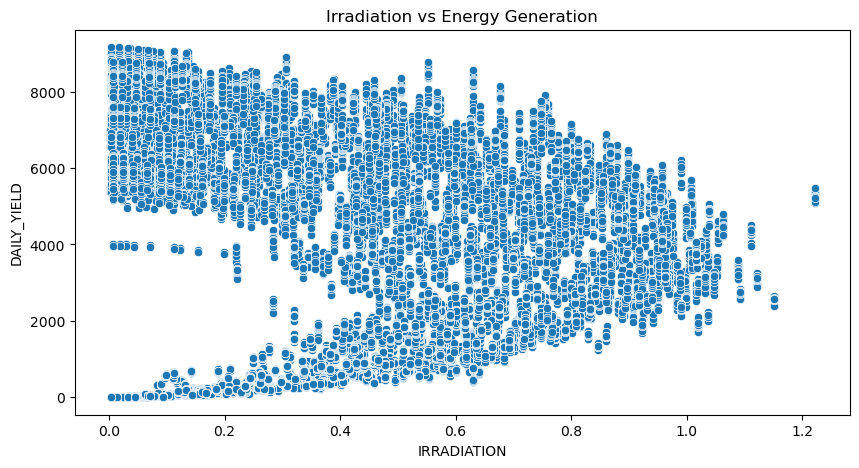

In [183]:
# Irradiation vs Daily Energy scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=plant1, x='IRRADIATION', y='DAILY_YIELD')
plt.title('Irradiation vs Energy Generation')
plt.show()

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# =============================
# Step 11: Simple Next-Day Prediction
# =============================

# Prepare lag features
plant1['prev_day_energy'] = plant1['DAILY_YIELD'].shift(24).bfill()  # Previous day energy
plant1['prev_hour_energy'] = plant1['DAILY_YIELD'].shift(1).bfill()  # Previous hour energy
plant1['temp_diff'] = plant1['AMBIENT_TEMPERATURE'].diff().fillna(0)  # Temperature difference

# Features and target
features = ['prev_day_energy', 'prev_hour_energy', 'IRRADIATION', 'temp_diff']
target = 'DAILY_YIELD'

# Prepare X and y
X = plant1[features].fillna(0)
y = plant1[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict next-day energy
y_pred = model.predict(X_test)

# Evaluate model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Next-Day Prediction RMSE: {rmse:.2f}")
print(f"Next-Day Prediction R² Score: {r2:.2f}")


Next-Day Prediction RMSE: 326.76
Next-Day Prediction R² Score: 0.99


C:\Users\palla\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [192]:
X = plant1[features].fillna(0)
y = plant1[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict next-day energy
y_pred = model.predict(X_test)

# Evaluate model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Next-Day Prediction RMSE: {rmse:.2f}")
print(f"Next-Day Prediction R² Score: {r2:.2f}")

Next-Day Prediction RMSE: 326.76
Next-Day Prediction R² Score: 0.99


C:\Users\palla\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [193]:
# Pipeline Complete
# =============================
print("Pipeline completed: Metrics calculated, low-performers identified, visualizations created, and simple next-day prediction done.")

Pipeline completed: Metrics calculated, low-performers identified, visualizations created, and simple next-day prediction done.


In [187]:
print(plant1.columns)


Index(['TIMESTAMP', 'PLANT_ID_X', 'SOURCE_KEY_X', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'DATE_X', 'HOUR_X', 'DAY_OF_WEEK_X',
       'MONTH_X', 'WEEK_X', 'PLANT_ID_Y', 'SOURCE_KEY_Y',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DATE_Y',
       'HOUR_Y', 'DAY_OF_WEEK_Y', 'MONTH_Y', 'WEEK_Y', 'TEMP_DIFF',
       'IRRADIATION_LEVEL', 'prev_hour_energy', 'prev_day_energy'],
      dtype='object')
